In [3]:
import pandas as pd
%matplotlib inline

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#print("train : ", train.shape, " ", " test : ", test.shape)
train.head()
test.head()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Banfield, Mr. Frederick James",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # 스타일/폰트 등의 속성 설정. 기본값으로 설정한다.

Pclass에 따른 생존률을 계산해 본다.<br>
Survived가 1은 생존, 0은 사망이므로 Pclass에 따라 그룹을 지어서 평균을 내면 Pclass에 따른 상대적인 생존률을 비교할 수 있을 것이다.

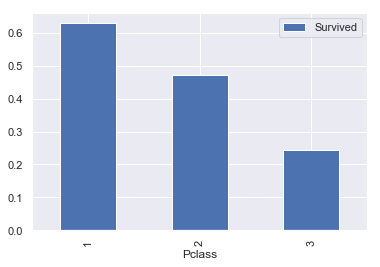

In [9]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False).plot.bar()

Seaborn.countplot()은 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다<br>
데이터프레임에만 사용할 수 있다.<br>
seaborn.countplot(x=None, data=None, hue=None ...) <br>
 - x : x축에 보여줄 데이터 
 - hue : x마다 hue 타입별로 분류해서 표시한다.
 - data : 데이터프레임

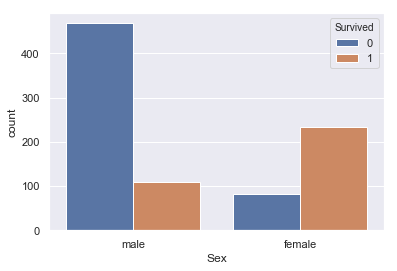

In [10]:
sns.countplot('Sex', hue='Survived', data=train)

kde(Kernel density estimation) : 임의 변수의 확률밀도함수를 추정하기 위한 non-parametric한 방법.<br>
feature의 smooth한 분포를 본다고 생각하면 될 것 같다.

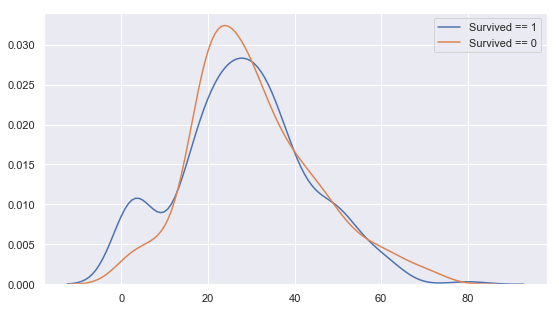

In [14]:
df = train[train['Age'].isnull() == False] # age는 nan이 많으므로 일단 걸러 내야 한다.
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[df['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df[df['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

위에서 Survived/Dead를 별개로 분포를 보는 것보다는 아래처럼 나이대를 나눠서 구간마다 Survived/Dead의 수를 비교하는 것이 한눈에 더 들어올 것 같음

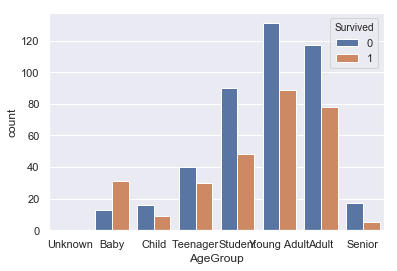

In [15]:
import numpy as np
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
# cut : value를 bins에 지정된 범위로 변환한다.(18.0, 24.0]와 같이 표현된다. labels를 지정하면 해당 범위에 명시된 label로 값이 변경된다.
train['AgeGroup'] = pd.cut(train["Age"], bins, labels=labels)
sns.countplot('AgeGroup', hue='Survived', data=train)

각각의 Pclass에 대해 Age의 분포를 plotting.

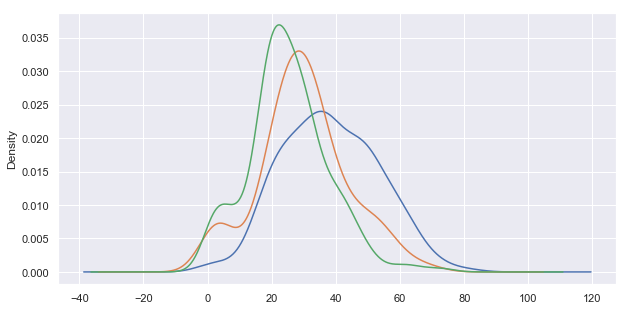

In [17]:
plt.figure(figsize=(10 ,5))
train['Age'][train['Pclass'] == 1].plot(kind='kde')
train['Age'][train['Pclass'] == 2].plot(kind='kde')
train['Age'][train['Pclass'] == 3].plot(kind='kde')
plt.show()

누적 그래프로 범위가 확장될수록 평균 값이 어떻게 변하는지 알 수 있다.

aga  0.42  ~  80.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  import sys


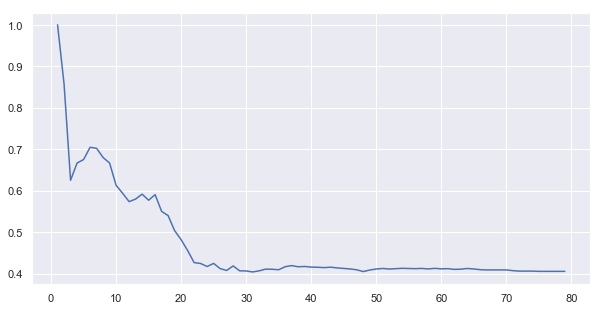

In [18]:
survival_ratios = []
age_min = train['Age'].min()
age_max = train['Age'].max()
print("aga ", age_min , " ~ ", age_max)
for i in range(int(age_min), int(age_max)):
    cummulated = train[train['Age'] < i]['Survived']
    survival_rate = cummulated.sum() / cummulated.shape[0]
    survival_ratios.append(survival_rate)
    
plt.figure(figsize=(10, 5))
plt.plot(survival_ratios)
plt.show()
    